In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("C:/Users/jonat/Downloads/Mall_Customers - Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


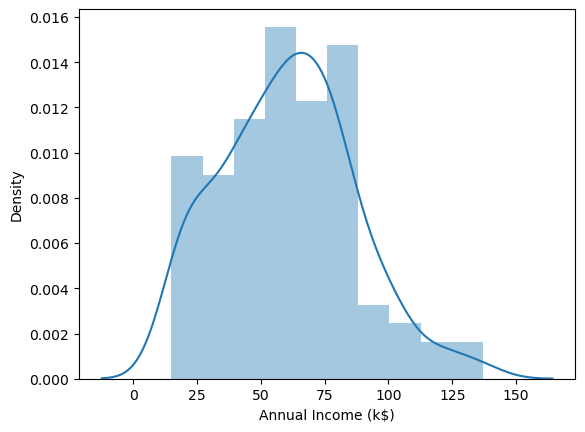

In [6]:
sns.distplot(df['Annual Income (k$)']);

In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

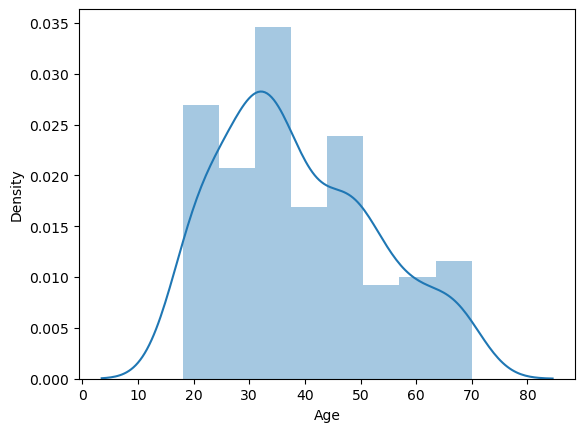

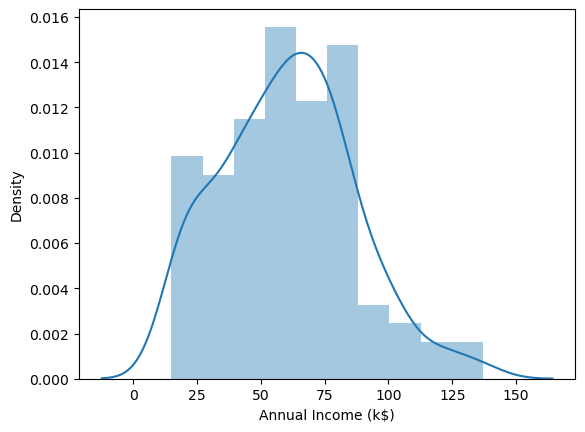

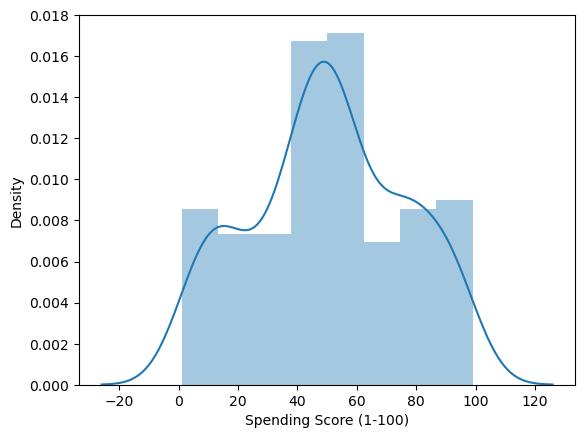

In [9]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

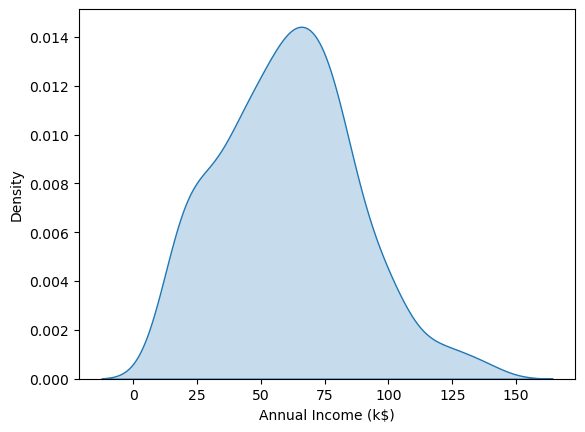

In [70]:
sns.kdeplot(df['Annual Income (k$)'],shade=True);

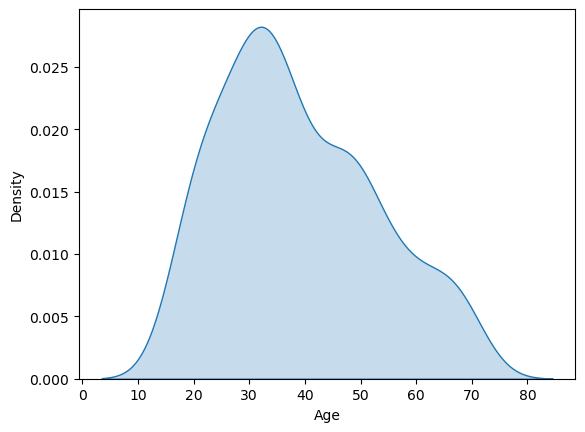

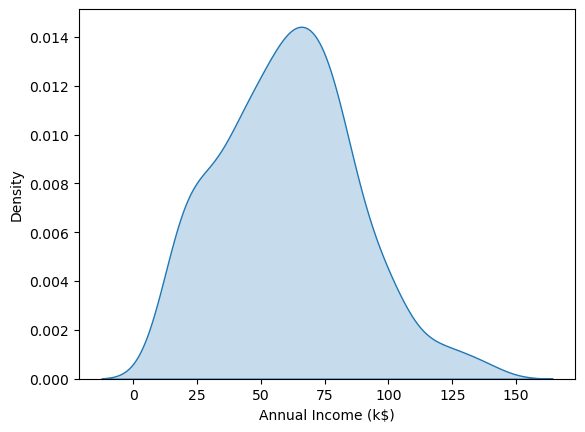

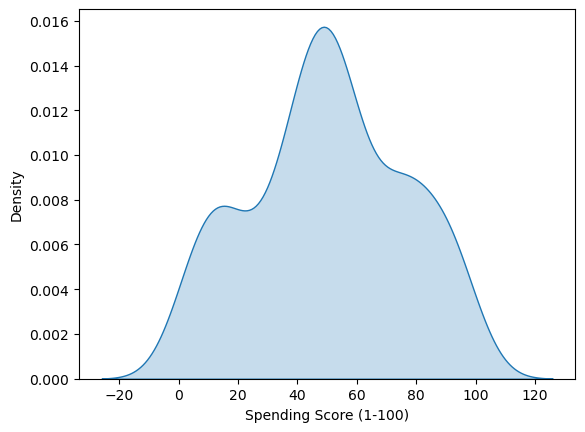

In [71]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(df[i],shade=True)

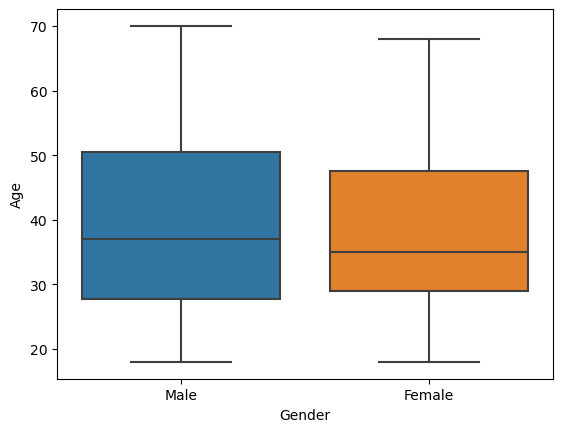

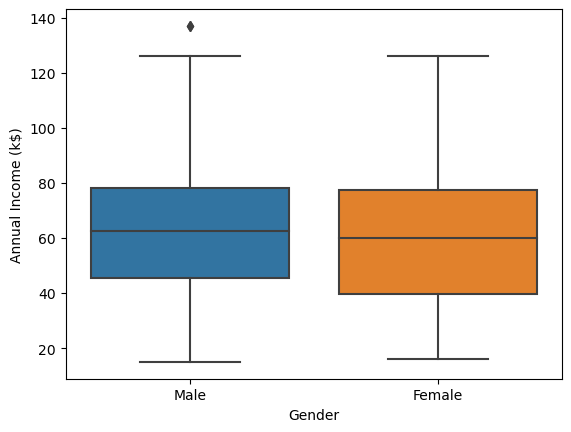

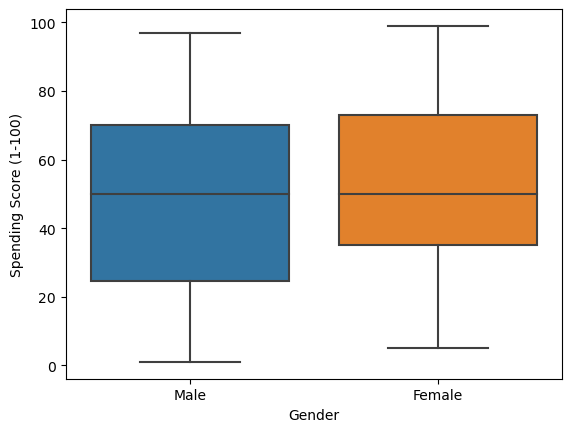

In [72]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i])

In [73]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

# Bivariate Analysis

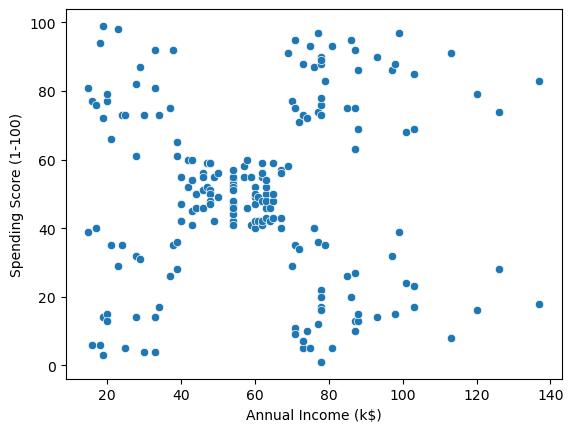

In [75]:
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)' );

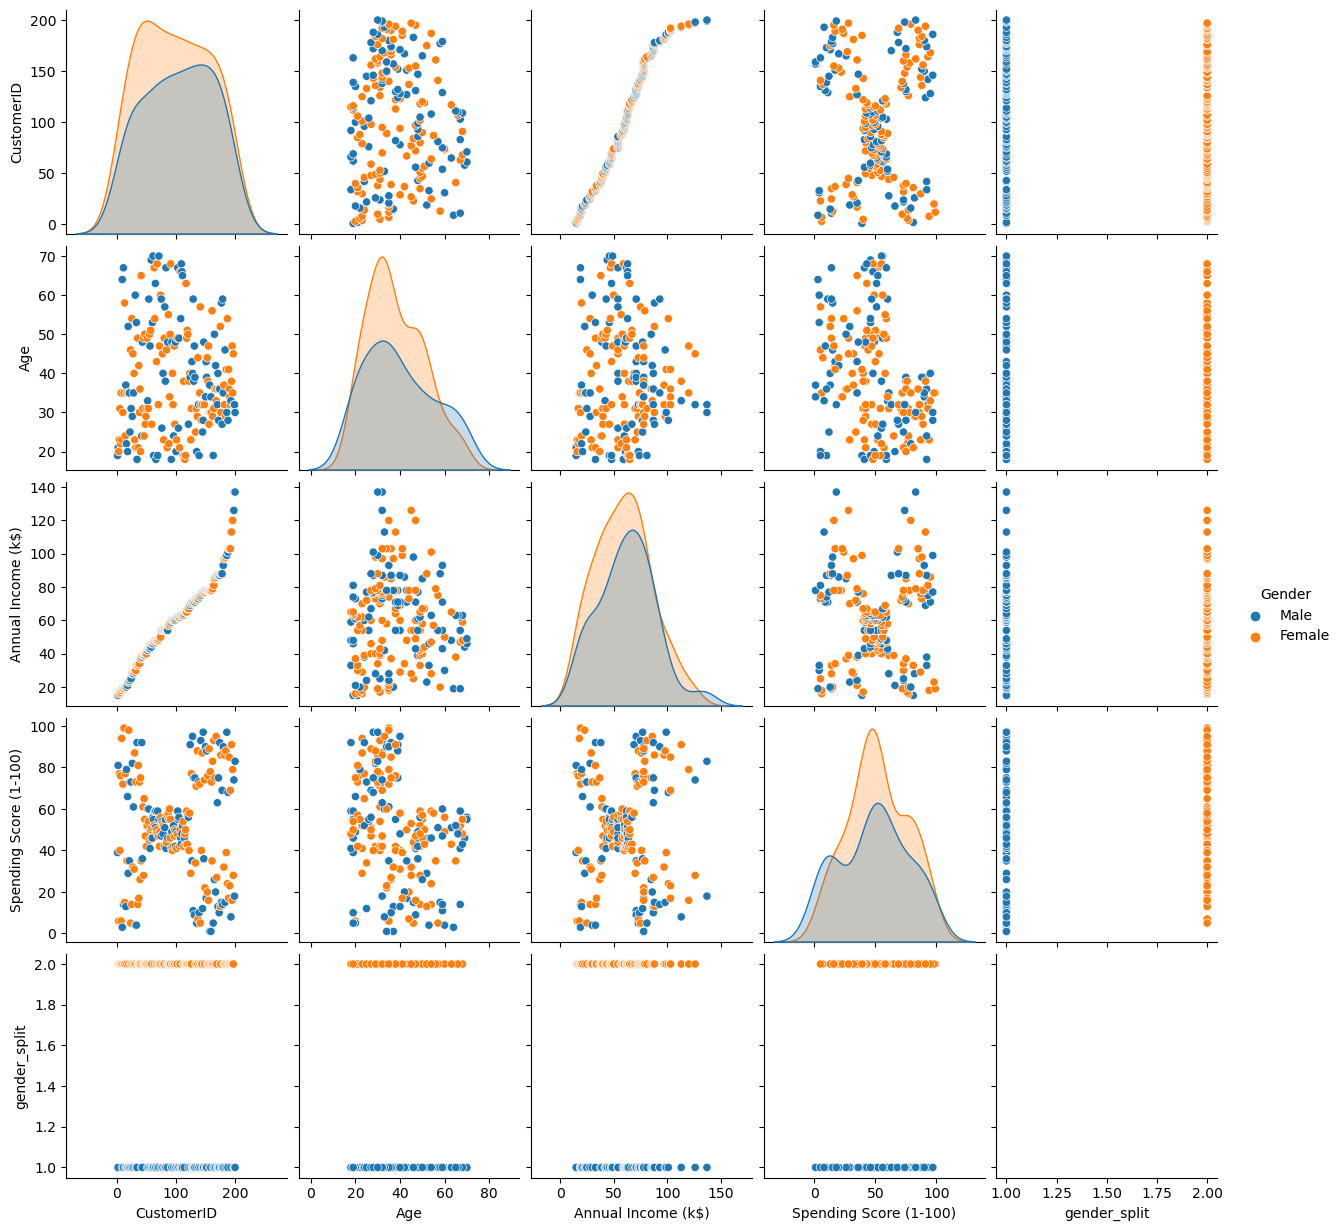

In [77]:
sns.pairplot(df,hue='Gender')

In [78]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [79]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),gender_split
CustomerID,1.000000,-0.026763,0.977548,0.013835,-0.057400
Age,-0.026763,1.000000,-0.012398,-0.327227,-0.060867
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903,-0.056410
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000,0.058109
gender_split,-0.057400,-0.060867,-0.056410,0.058109,1.000000


<Axes: >

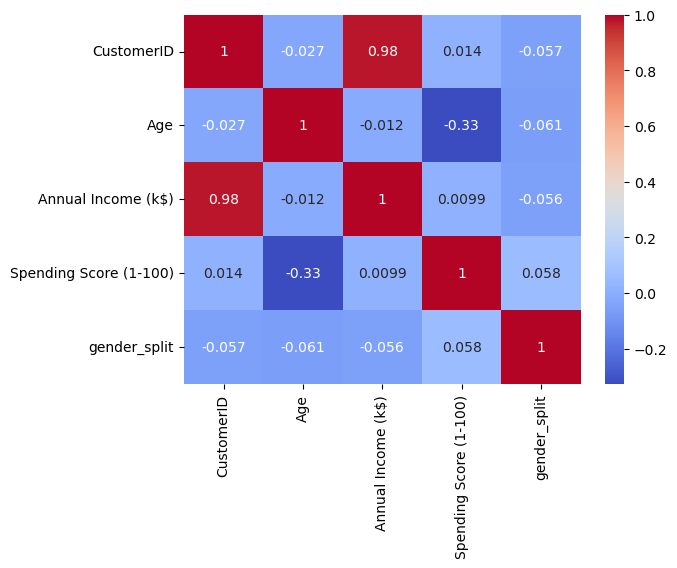

In [80]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

# Clustering - Univariate, Bivariate, Multivariate

In [81]:
clustering1 = KMeans(n_clusters=3)

In [82]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [83]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [84]:
df['Income Cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),gender_split,Income Cluster
0,1,Male,19,15,39,1,0
1,2,Male,21,15,81,1,0
2,3,Female,20,16,6,2,0
3,4,Female,23,16,77,2,0
4,5,Female,31,17,40,2,0


In [85]:
df['Income Cluster'].value_counts()

2    92
0    72
1    36
Name: Income Cluster, dtype: int64

In [86]:
clustering1.inertia_

23528.15217391306

In [87]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)

In [88]:
intertia_scores

[137277.28000000006,
 48660.888888888876,
 23517.33093093093,
 13278.112713472483,
 8481.49619047619,
 5050.9047619047615,
 3949.275613275612,
 2862.2504273504273,
 2173.2874458874467,
 1734.1677489177496]

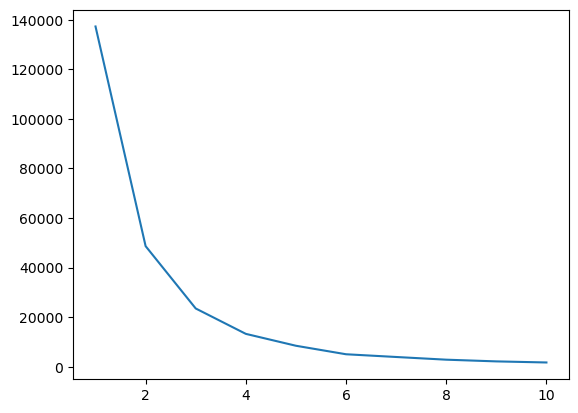

In [89]:
plt.plot(range(1,11),intertia_scores);

In [90]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'gender_split', 'Income Cluster'],
      dtype='object')

In [91]:
df.groupby('Income Cluster')['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,38.930556,33.027778,50.166667
1,37.833333,99.888889,50.638889
2,39.184783,66.717391,50.054348


# Bivariate Clustering

In [98]:

clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] =clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),gender_split,Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,0,4
1,2,Male,21,15,81,1,0,0
2,3,Female,20,16,6,2,0,4
3,4,Female,23,16,77,2,0,0
4,5,Female,31,17,40,2,0,4


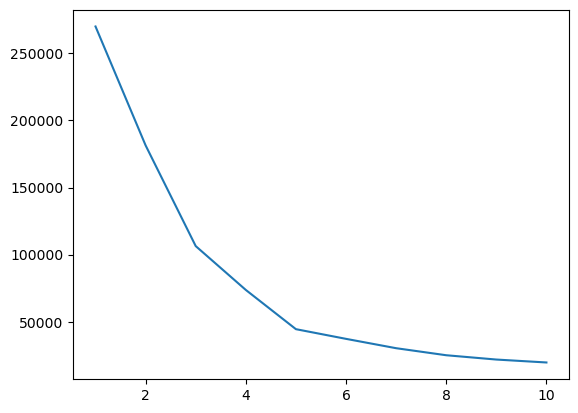

In [93]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2);

In [94]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

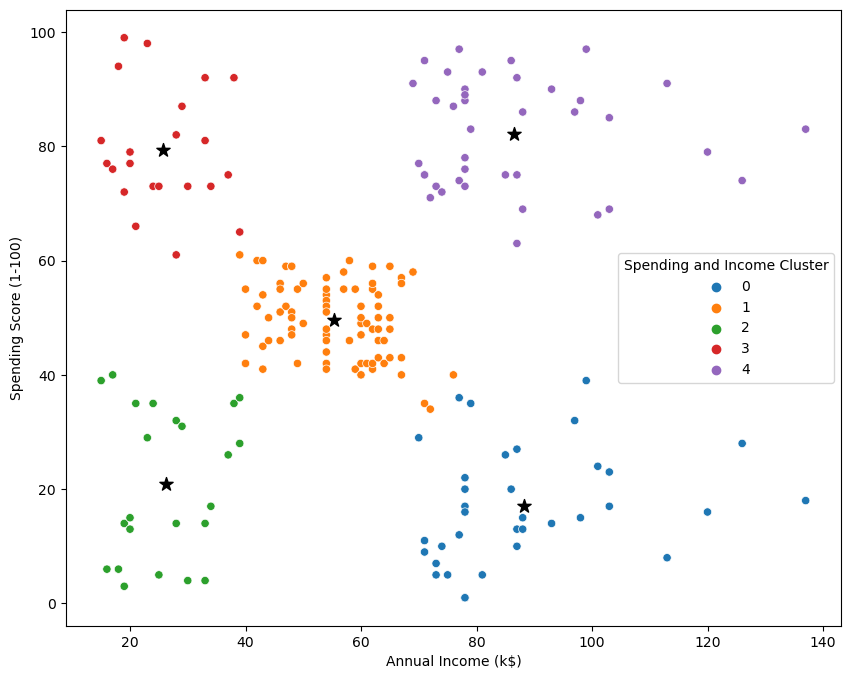

In [95]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivaraiate.png')

In [96]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.457143,0.542857
1,0.592593,0.407407
2,0.608696,0.391304
3,0.590909,0.409091
4,0.538462,0.461538


In [97]:
df.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,41.114286,88.200000,17.114286
1,42.716049,55.296296,49.518519
2,45.217391,26.304348,20.913043
3,25.272727,25.727273,79.363636
4,32.692308,86.538462,82.128205


# Mulivariate clustering 


In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
scale = StandardScaler()

In [101]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),gender_split,Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,0,4
1,2,Male,21,15,81,1,0,0
2,3,Female,20,16,6,2,0,4
3,4,Female,23,16,77,2,0,0
4,5,Female,31,17,40,2,0,4


In [102]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),gender_split,Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,1,0,4,1
1,2,21,15,81,1,0,0,1
2,3,20,16,6,2,0,4,0
3,4,23,16,77,2,0,0,0
4,5,31,17,40,2,0,4,0


In [103]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'gender_split', 'Income Cluster', 'Spending and Income Cluster',
       'Gender_Male'],
      dtype='object')

In [104]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [106]:
dff = scale.fit_transform(dff)

In [107]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


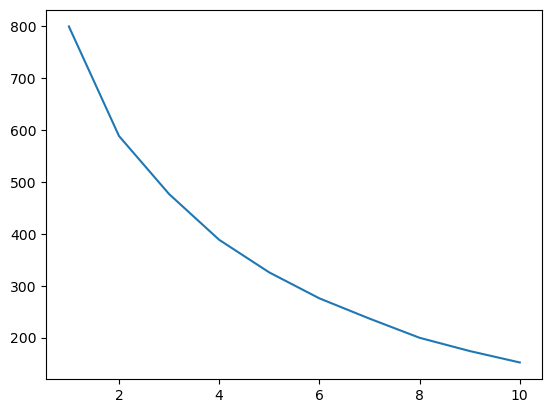

In [108]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3);

In [109]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),gender_split,Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,0,4
1,2,Male,21,15,81,1,0,0
2,3,Female,20,16,6,2,0,4
3,4,Female,23,16,77,2,0,0
4,5,Female,31,17,40,2,0,4
...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,1,2
196,197,Female,45,126,28,2,1,1
197,198,Male,32,126,74,1,1,2
198,199,Male,32,137,18,1,1,1


In [111]:
df.to_csv('Clustering.csv')